In [12]:
from data.poisson_data import PoissonTimeShiftedData
import torch
import matplotlib.pyplot as plt
from boltzmann_machines.cp_rtrbm import RTRBM

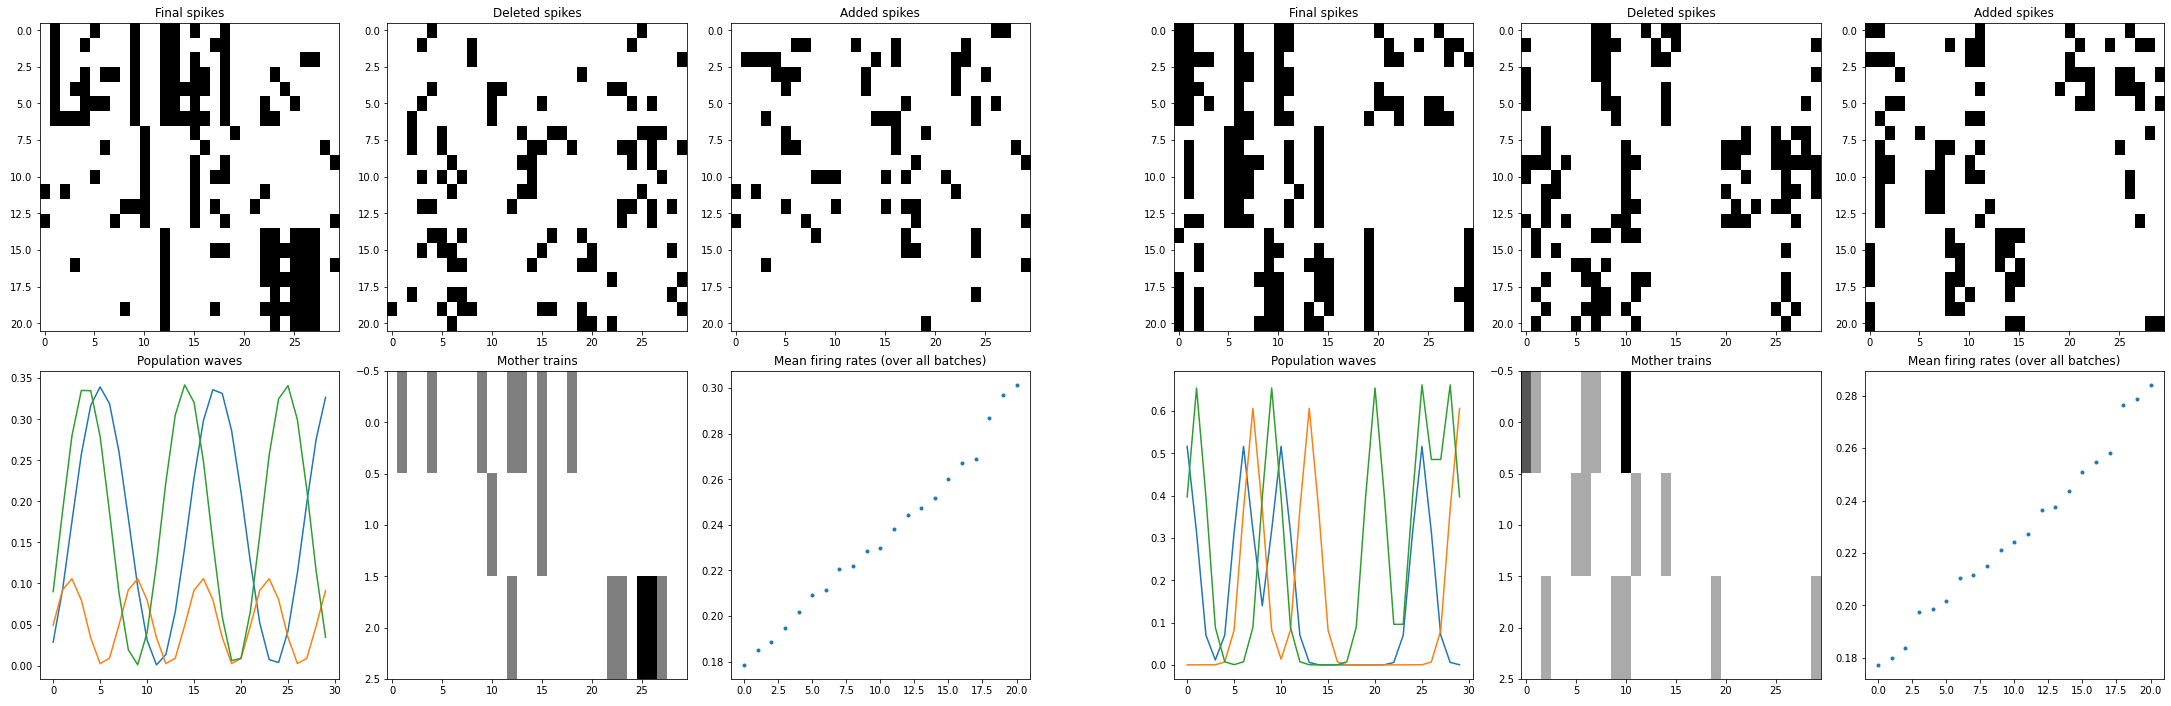

In [10]:
N_V, N_H, T, n_batches = 21, 3, 30, 500

temporal_conn = torch.tensor([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])

poissonSinusoid = PoissonTimeShiftedData(
    neurons_per_population=N_V//N_H,
    n_populations=N_H,
    n_batches=n_batches,
    time_steps_per_batch=T,
    temporal_connections=temporal_conn,
    population_wave_form='sin',
    frequency_range=[2, 5],
    amplitude_range=[.05, .3],
)

poissonGaussian = PoissonTimeShiftedData(
    neurons_per_population=N_V//N_H,
    n_populations=N_H,
    n_batches=n_batches,
    time_steps_per_batch=T,
    temporal_connections=temporal_conn,
    population_wave_form='gaussian',
    n_peaks_range=[2, 8],
    bandwidth=1,
    amplitude_range=[.5, 1],
)

fig = plt.figure(constrained_layout=True, figsize=(30, 10))
subfigs = fig.subfigures(1, 2, wspace=.1)

poissonSinusoid.plot_stats(axes=subfigs[0].subplots(2, 3))
poissonGaussian.plot_stats(axes=subfigs[1].subplots(2, 3))

subfigs[0].suptitle('Sinusoid', fontsize=20)
subfigs[1].suptitle('Gaussian', fontsize=20)

plt.show()

100%|██████████| 100/100 [09:57<00:00,  5.97s/it]


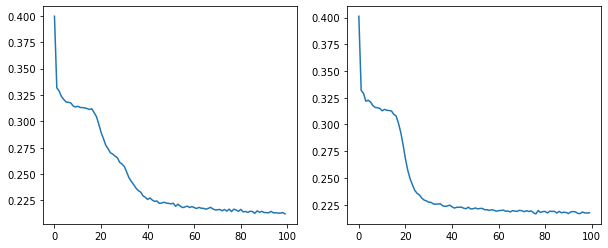

  3%|▎         | 3/100 [00:23<12:26,  7.69s/it]


KeyboardInterrupt: 

In [14]:
# split in train and test set
sin_train = poissonSinusoid.data[..., :400]
sin_test = poissonSinusoid.data[..., 400:]
gaus_train = poissonSinusoid.data[..., :400]
gaus_test = poissonSinusoid.data[..., 400:]

# initialize RTRBMs
sin_rtrbm = RTRBM(sin_train, N_H=3, debug_mode=True)
gaus_rtrbm = RTRBM(gaus_train, N_H=3, debug_mode=True)

# train RTRBMs
sin_rtrbm.learn(n_epochs=100, batch_size=10, lr=1e-3, device='cpu')
gaus_rtrbm.learn(n_epochs=100, batch_size=10, lr=1e-3, device='cpu')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(sin_rtrbm.errors)
axes[1].plot(gaus_rtrbm.errors)

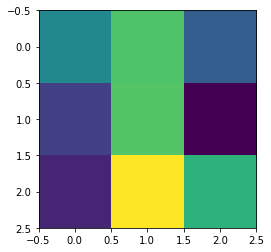

In [17]:
plt.imshow(sin_rtrbm.U.cpu())

In [ ]:
i